In [49]:
#Importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

# Load the Dataset

In [2]:
pwd

'C:\\Users\\nikhi\\Downloads\\retailbox-master\\retailbox-master'

In [3]:
cd C:\Users\nikhi\Downloads

C:\Users\nikhi\Downloads


In [50]:

Product_Rate = pd.read_csv('Rating_Product.csv')

Product_Rate = Product_Rate.dropna()

Product_Rate.head(10)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
5,AKJHHD5VEH7VG,0762451459,5.0,1404518400
6,A1BG8QW55XHN6U,1304139212,5.0,1371945600
7,A22VW0P4VZHDE3,1304139220,5.0,1373068800
8,A3V3RE4132GKRO,130414089X,5.0,1401840000
9,A327B0I7CYTEJC,130414643X,4.0,1389052800


In [51]:

Product_Rate.shape

(2023070, 4)

# Find top 10 Popular Products


In [53]:
popular_p = pd.DataFrame(Product_Rate.groupby('ProductId')['Rating'].count())
most_popular = popular_p.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838



The graph gives us the most popular products (arranged in descending order) sold by the business.

For eaxmple, product, ID # B001MA0QY2 has sales of over 7000, the next most popular product, ID # B0009V1YR8 has sales of 3000, etc


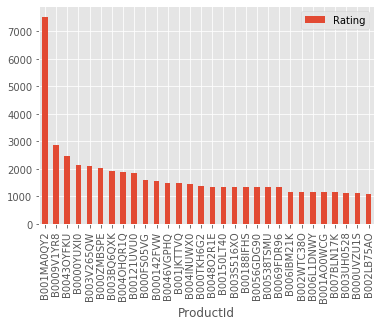

In [16]:
most_popular.head(30).plot(kind = "bar")

# Recommendation System - Part II
Model-based collaborative filtering system¶
Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.

A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.

Utility Matrix based on products sold and user reviews
Utility Matrix

An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all teh items in the list, hence, most of the values are unknown.

In [17]:

# Subset of product Ratings

Product_Rate1 = Product_Rate.head(10000)

In [18]:
ratings_utility_matrix = Product_Rate1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As expected, the utility matrix obtaned above is sparce, we have filled up the unknown values wth 0.

In [20]:

ratings_utility_matrix.shape

(9697, 886)

Transposing the matrix

In [22]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:

X.shape

(886, 9697)

Unique products in subset of data

In [25]:
X1 = X

Decomposing the Matrix

In [26]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

Correlation Matrix

In [28]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

Isolating Product ID # 6117036094 from the Correlation Matrix
Assuming the customer buys Product ID # 6117036094 (randomly chosen)



In [29]:
X.index[99]


'6117036094'

Index # of product ID purchased by customer

In [30]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [31]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

# Recommending top 10 highly correlated products in sequence

In [36]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['602260074X', '9790797885', 'B000052YKG']

Product Id # Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

# Recommendation System - Part III
For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.

In [35]:

# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [37]:
product_descriptions = pd.read_csv('product_descriptions.csv')
product_descriptions.shape

(124428, 2)

Checking for missing values

In [38]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [39]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

Feature extraction from product descriptions¶
Converting the text in product description into numerical data for analysis

In [40]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

Visualizing product clusters in subset of data

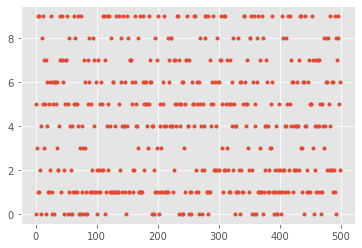

In [41]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [42]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Output
Recommendation of product based on the current product selected by user.
To recommend related product based on, Frequently bought together.




Top words in each cluster based on product description

In [43]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 cutting
 pole
 blade
 saw
 tool
 easy
 pruner
 power
 window
 motor
Cluster 1:
 water
 easy
 tank
 heater
 toilet
 helps
 year
 design
 cycle
 installation
Cluster 2:
 light
 watt
 bulb
 led
 fan
 bulbs
 fixture
 lighting
 energy
 free
Cluster 3:
 metal
 drill
 steel
 20
 watering
 screw
 gauge
 hole
 use
 plated
Cluster 4:
 storage
 shelves
 easy
 piece
 commercial
 installation
 wall
 finish
 design
 residential
Cluster 5:
 concrete
 ft
 brush
 water
 use
 seal
 provides
 paint
 based
 insulation
Cluster 6:
 ft
 wood
 vary
 100
 product
 painting
 painted
 rug
 tape
 store
Cluster 7:
 frame
 patio
 collection
 fabric
 dining
 dog
 outdoor
 rust
 cushions
 wicker
Cluster 8:
 power
 air
 cooling
 cabinet
 pull
 volt
 unit
 control
 room
 center
Cluster 9:
 post
 fence
 posts
 trim
 rail
 ft
 azek
 painted
 speaker
 plate


Predicting clusters based on key search words

In [44]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

Keyword : Cutting tool

In [45]:
show_recommendations("cutting tool")

Cluster 0:
 cutting
 pole
 blade
 saw
 tool
 easy
 pruner
 power
 window
 motor


Keyword : spray paint

In [46]:
show_recommendations("spray paint")

Cluster 5:
 concrete
 ft
 brush
 water
 use
 seal
 provides
 paint
 based
 insulation


Keyword : steel drill

In [47]:
show_recommendations("steel drill")

Cluster 3:
 metal
 drill
 steel
 20
 watering
 screw
 gauge
 hole
 use
 plated


In case a word appears in multiple clusters, the algorithm chooses the cluster with the highest frequency of occurance of the word.



Keyword : water

In [48]:
show_recommendations("water")

Cluster 1:
 water
 easy
 tank
 heater
 toilet
 helps
 year
 design
 cycle
 installation


Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.

# Summary:
This works best if a business is setting up its e-commerce website for the first time and does not have user-item purchase/rating history to start with initally. This recommendation system will help the users get a good recommendation to start with and once the buyers have a purchased history, the recommendation engine can use the model based collaborative filtering technique.